In [ ]:
# Build a Kmeans Model

In [23]:
# Import standard operational packages.
import numpy as np
import pandas as pd

# Important tools for modeling and evaluation.
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Import visualization packages.
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Import data
# Save the `pandas` DataFrame in variable `penguins`.
penguins = pd.read_csv("D:\VSCODE\Machine Learning\penguins.csv")

<>:3: SyntaxWarning: invalid escape sequence '\V'
<>:3: SyntaxWarning: invalid escape sequence '\V'
C:\Users\foggd\AppData\Local\Temp\ipykernel_27048\1763503685.py:3: SyntaxWarning: invalid escape sequence '\V'
  penguins = pd.read_csv("D:\VSCODE\Machine Learning\penguins.csv")


In [3]:
# Review the first 10 rows

penguins.head(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,female
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,male
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN


In [5]:
# Step 2: Data exploration
# Find out how many penguin types there are

penguins['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [6]:
# Find the count of each species type
penguins['species'].value_counts(dropna = False)

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

In [7]:
# Check for missing values.

penguins.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [8]:
# Drop rows with missing values.
# Save DataFrame in variable `penguins_subset`.
penguins_subset = penguins.dropna(axis=0).reset_index(drop = True)


In [9]:
penguins_subset.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [10]:
penguins_subset.head(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male
5,Adelie,Torgersen,38.9,17.8,181.0,3625.0,female
6,Adelie,Torgersen,39.2,19.6,195.0,4675.0,male
7,Adelie,Torgersen,41.1,17.6,182.0,3200.0,female
8,Adelie,Torgersen,38.6,21.2,191.0,3800.0,male
9,Adelie,Torgersen,34.6,21.1,198.0,4400.0,male


In [11]:
# Encode data
penguins_subset['sex'] = penguins_subset['sex'].str.upper()

In [12]:
# Convert `sex` column from categorical to numeric.

penguins_subset = pd.get_dummies(penguins_subset, drop_first = True, columns=['sex'])

In [13]:
# Drop the island column.
penguins_subset = penguins_subset.drop(['island'], axis=1)

In [14]:
# Scale the features
# Exclude `species` variable from X

X = penguins_subset.drop(['species'], axis=1)

In [15]:
#Scale the features.
#Assign the scaled data to variable `X_scaled`.
X_scaled = StandardScaler().fit_transform(X)

In [16]:
# Step 3 Data modeling
# Fit K-means and evaluate inertia for different values of k.


num_clusters = [i for i in range(2, 11)]

def kmeans_inertia(num_clusters, x_vals):
    """
    Accepts as arguments list of ints and data array. 
    Fits a KMeans model where k = each value in the list of ints. 
    Returns each k-value's inertia appended to a list.
    """
    inertia = []
    for num in num_clusters:
        kms = KMeans(n_clusters=num, random_state=42)
        kms.fit(x_vals)
        inertia.append(kms.inertia_)

    return inertia

In [17]:
# Return a list of inertia for k=2 to 10. Using Kmeans

inertia = kmeans_inertia(num_clusters, X_scaled)
inertia

[885.622414365225,
 578.8284278107235,
 477.2295673528194,
 284.5464837898288,
 218.05156297830223,
 201.51585567445807,
 196.58908645819537,
 180.65751845628574,
 170.15703589755498]

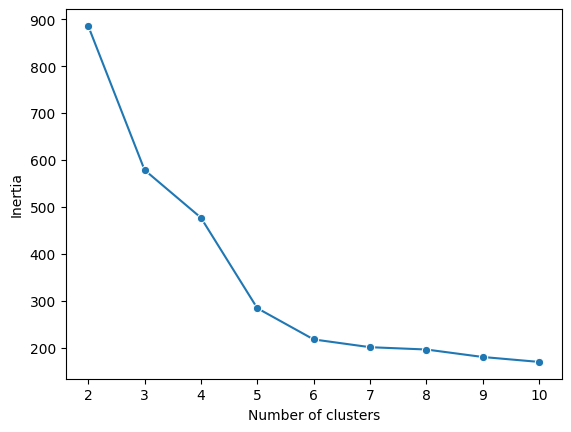

In [18]:
# create a line plot that shows the relationship between num_clusters and inertia. Use either seaborn or matplotlib to visualize this relationship

plot = sns.lineplot(x=num_clusters, y=inertia, marker = 'o')
plot.set_xlabel("Number of clusters");
plot.set_ylabel("Inertia");

In [19]:
# Step 4: Results and evaluation

# Evaluate silhouette score.
# Write a function to return a list of each k-value's score.

### YOUR CODE HERE ###

def kmeans_sil(num_clusters, x_vals):
    """
    Accepts as arguments list of ints and data array. 
    Fits a KMeans model where k = each value in the list of ints.
    Calculates a silhouette score for each k value. 
    Returns each k-value's silhouette score appended to a list.
    """
    sil_score = []
    for num in num_clusters:
        kms = KMeans(n_clusters=num, random_state=42)
        kms.fit(x_vals)
        sil_score.append(silhouette_score(x_vals, kms.labels_))

    return sil_score


sil_score = kmeans_sil(num_clusters, X_scaled)
sil_score

[np.float64(0.44398088353055243),
 np.float64(0.45101024097188364),
 np.float64(0.4489699212061027),
 np.float64(0.519998574860868),
 np.float64(0.5223086008347773),
 np.float64(0.47386350642293157),
 np.float64(0.4715443426463867),
 np.float64(0.4160561489496056),
 np.float64(0.418306343369105)]

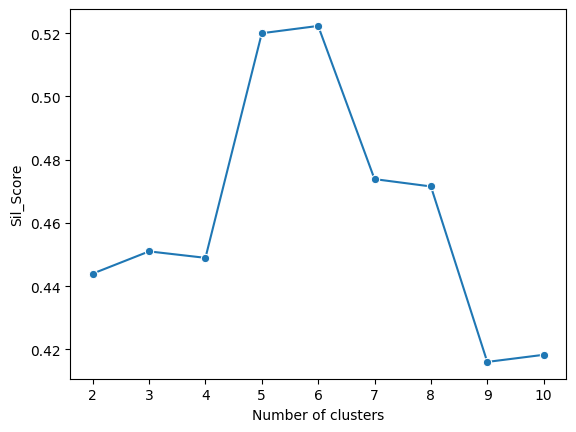

In [20]:
# Create a line plot that shows the relationship between num_clusters and sil_score

plot = sns.lineplot(x=num_clusters, y=sil_score, marker = 'o')
plot.set_xlabel("Number of clusters");
plot.set_ylabel("Sil_Score");

In [21]:
# Fit  a 6cluster model

kmeans6 = KMeans(n_clusters=6, random_state=42)
kmeans6.fit(X_scaled)



KMeans(n_clusters=6, random_state=42)

In [24]:
# Print unique labels.
print('Unique labels:', np.unique(kmeans6.labels_))

Unique labels: [0 1 2 3 4 5]


In [25]:
# Create a new column cluster that indicates cluster assignment in the DataFrame penguins_subset. It's important to understand the meaning of each cluster's labels, then decide whether the clustering makes sense.

penguins_subset['cluster'] = kmeans6.labels_
penguins_subset.head()


,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex_MALE,cluster
0,Adelie,39.1,18.7,181.0,3750.0,True,5
1,Adelie,39.5,17.4,186.0,3800.0,False,2
2,Adelie,40.3,18.0,195.0,3250.0,False,2
3,Adelie,36.7,19.3,193.0,3450.0,False,2
4,Adelie,39.3,20.6,190.0,3650.0,True,5


In [26]:
# Verify if any `cluster` can be differentiated by `species`.

penguins_subset.groupby(by=['cluster', 'species']).size()

cluster  species  
0        Chinstrap    32
1        Gentoo       58
2        Adelie       73
         Chinstrap     2
3        Adelie        2
         Chinstrap    34
4        Gentoo       61
5        Adelie       71
dtype: int64

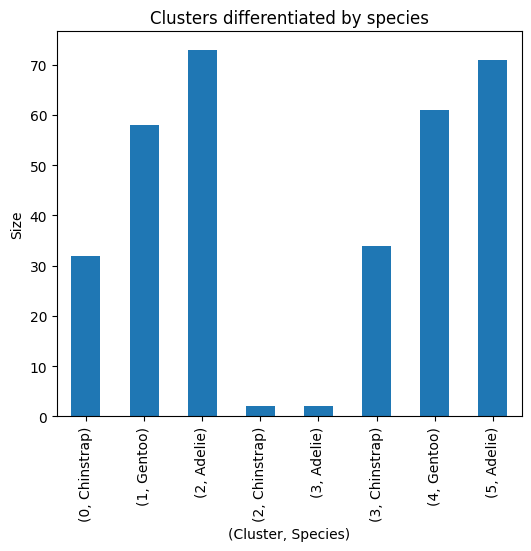

In [27]:
penguins_subset.groupby(by=['cluster', 'species']).size().plot.bar(title='Clusters differentiated by species',
                                                                   figsize=(6, 5),
                                                                   ylabel='Size',
                                                                   xlabel='(Cluster, Species)');

In [28]:
# Verify if each `cluster` can be differentiated by `species` AND `sex_MALE`.

penguins_subset.groupby(by=['cluster','species', 'sex_MALE']).size().sort_values(ascending = False)

cluster  species    sex_MALE
2        Adelie     False       73
5        Adelie     True        71
4        Gentoo     True        61
1        Gentoo     False       58
3        Chinstrap  True        34
0        Chinstrap  False       32
2        Chinstrap  False        2
3        Adelie     True         2
dtype: int64

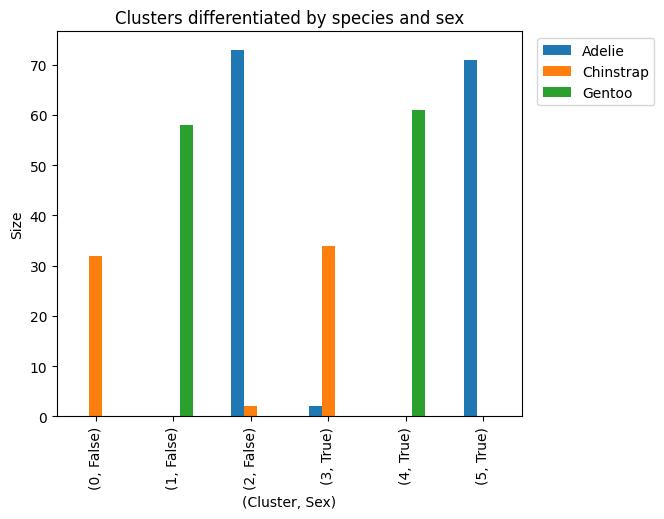

In [29]:
# Finally, interpret the groupby outputs and visualize these results. The graph shows that each 'cluster' can be differentiated by 'species' and 'sex_MALE'. Furthermore, each cluster is mostly comprised of one sex and one species

penguins_subset.groupby(by=['cluster','species','sex_MALE']).size().unstack(level = 'species', fill_value=0).plot.bar(title='Clusters differentiated by species and sex',
                                                                                                                      figsize=(6, 5),
                                                                                                                      ylabel='Size',
                                                                                                                      xlabel='(Cluster, Sex)')
plt.legend(bbox_to_anchor=(1.3, 1.0))